# Linear Regression implementaion

### import libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [4]:
data = pd.read_csv('Real estate.csv')

In [5]:
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


- so we have 6 feature or attribute and and we have our output values y 
- all the value are numeric in nature 


In [6]:
# summary
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


- we can transform date column into 3 different form i.e year,date and month

In [8]:
# checking null values 
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

- we don't have any null values 
- if we had null values then we can drop those null values 

In [9]:
# removing null values 

In [10]:
data.dropna()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [12]:
# mean
house_age_mean = data['X2 house age'].mean()

In [13]:
print("house_age_mean", house_age_mean)

house_age_mean 17.71256038647343


In [14]:
mean_number_of_convenience_stores = data['X4 number of convenience stores'].mean()

In [15]:
print("number of convenience stores", mean_number_of_convenience_stores)

number of convenience stores 4.094202898550725


In [16]:
import seaborn as sns

**Regression plot**

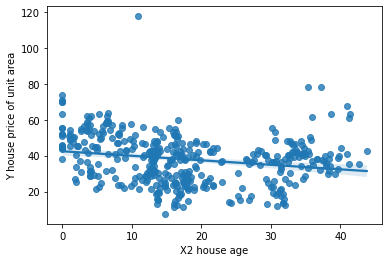

In [17]:
sns.regplot(x = 'X2 house age' , y='Y house price of unit area', data=data)

In [18]:
from scipy import stats

In [19]:
# corelation 

pearson_soef,p_values = stats.pearsonr(data['X2 house age'], data['Y house price of unit area'])

In [20]:
print("the relationship between house age and the price of the house price per unit area is", pearson_soef, "with p_value of", p_values )

the relationship between house age and the price of the house price per unit area is -0.21056704627721684 with p_value of 1.5604255047968973e-05


- so we can see that the correlation is negative which is also visible from graph because it is going toward negative direction 
- but it is not going in very straight line so it shows the relationship is a weak relationship so it doesn't have strong rlationship 
- next we have p value which is 1.56 which is again not a very high value 

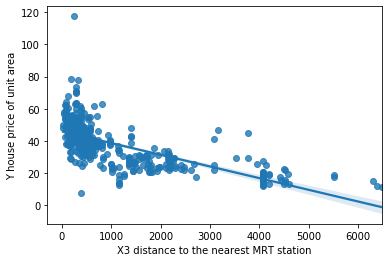

In [21]:
sns.regplot(x = 'X3 distance to the nearest MRT station' , y='Y house price of unit area', data=data)

In [22]:
# corelation 

pearson_soef,p_values = stats.pearsonr(data['X3 distance to the nearest MRT station'], data['Y house price of unit area'])

In [23]:
print("the relationship between house age and the price of the house price per unit area is", pearson_soef, "with p_value of", p_values )

the relationship between house age and the price of the house price per unit area is -0.6736128553689181 with p_value of 4.639825030361253e-56


- here we got corelation value is -0.67 which is not very high correlation and p value is 4.63 which is also an acceptable value 

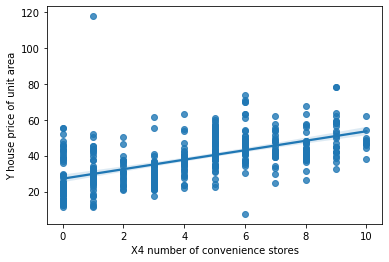

In [24]:
sns.regplot(x = 'X4 number of convenience stores' , y='Y house price of unit area', data=data)

In [25]:
# corelation 

pearson_soef,p_values = stats.pearsonr(data['X4 number of convenience stores'], data['Y house price of unit area'])

In [26]:
print("the relationship between house age and the price of the house price per unit area is", pearson_soef, "with p_value of", p_values )

the relationship between house age and the price of the house price per unit area is 0.5710049111111484 with p_value of 3.413483340495964e-37


- for this the correlation is +ve 0.57 but it is also not very high value 
- And p value is 3.41 which is also acceptable

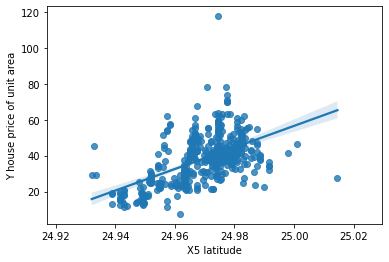

In [27]:
sns.regplot(x = 'X5 latitude' , y='Y house price of unit area', data=data)

In [28]:
# corelation 

pearson_soef,p_values = stats.pearsonr(data['X5 latitude'], data['Y house price of unit area'])

In [30]:
# corelation 

pearson_soef,p_values = stats.pearsonr(data['X5 latitude'], data['Y house price of unit area'])

In [31]:
print("the relationship between house age and the price of the house price per unit area is", pearson_soef, "with p_value of", p_values )

the relationship between house age and the price of the house price per unit area is 0.5463066525035893 with p_value of 1.3877612957789282e-33


- here the coreelation value is 0.54 which is also not very high
- and p value is 1.3 which is not very high

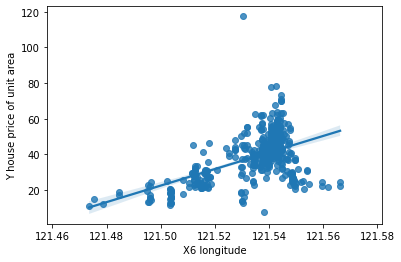

In [32]:
sns.regplot(x = 'X6 longitude' , y='Y house price of unit area', data=data)

In [33]:
# corelation 

pearson_soef,p_values = stats.pearsonr(data['X6 longitude'], data['Y house price of unit area'])

In [34]:
print("the relationship between house age and the price of the house price per unit area is", pearson_soef, "with p_value of", p_values )

the relationship between house age and the price of the house price per unit area is 0.5232865070287727 with p_value of 1.7651906040485146e-30


- longitude correlation value is not also very high 
- so we would have remove the column only if the corelation value is greater than 0.9


- we have done this here one by one 
- we can simply apply pandas profiling 

In [35]:
import pandas_profiling as pp

In [36]:
profile = pp.ProfileReport(data)
profile.to_file("output.html")

In [37]:
profile

# Linear regression

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
# creating object 
lm = LinearRegression()

In [40]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
dir(lm)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'predict',
 'score',
 'set_params']

In [42]:
# here we will implement linear regression only for one value 

In [43]:
# simple linear regression
x2 = data['X2_house_age']
y = data['Y_house_price_of_unit_area']

In [44]:
lm.fit(x2,y)

ValueError: Expected 2D array, got 1D array instead:
array=[32.  19.5 13.3 13.3  5.   7.1 34.5 20.3 31.7 17.9 34.8  6.3 13.  20.4
 13.2 35.7  0.  17.7 16.9  1.5  4.5 10.5 14.7 10.1 39.6 29.3  3.1 10.4
 19.2  7.1 25.9 29.6 37.9 16.5 15.4 13.9 14.7 12.   3.1 16.2 13.6 16.8
 36.1 34.4  2.7 36.6 21.7 35.9 24.2 29.4 21.7 31.3 32.1 13.3 16.1 31.7
 33.6  3.5 30.3 13.3 11.   5.3 17.2  2.6 17.5 40.1  1.   8.5 30.4 12.5
  6.6 35.5 32.5 13.8  6.8 12.3 35.9 20.5 38.2 18.  11.8 30.8 13.2 25.3
 15.1  0.   1.8 16.9  8.9 23.   0.   9.1 20.6 31.9 40.9  8.   6.4 28.4
 16.4  6.4 17.5 12.7  1.1  0.  32.7  0.  17.2 12.2 31.4  4.   8.1 33.3
  9.9 14.8 30.6 20.6 30.9 13.6 25.3 16.6 13.3 13.6 31.5  0.   9.9  1.1
 38.6  3.8 41.3 38.5 29.6  4.  26.6 18.  33.4 18.9 11.4 13.6 10.  12.9
 16.2  5.1 19.8 13.6 11.9  2.1  0.   3.2 16.4 34.9 35.8  4.9 12.   6.5
 16.9 13.8 30.7 16.1 11.6 15.5  3.5 19.2 16.   8.5  0.  13.7  0.  28.2
 27.6  8.4 24.   3.6  6.6 41.3  4.3 30.2 13.9 33.  13.1 14.  26.9 11.6
 13.5 17.  14.1 31.4 20.9  8.9 34.8 16.3 35.3 13.2 43.8  9.7 15.2 15.2
 22.8 34.4 34.  18.2 17.4 13.1 38.3 15.6 18.  12.8 22.2 38.5 11.5 34.8
  5.2  0.  17.6  6.2 18.1 19.2 37.8 28.  13.6 29.3 37.2  9.  30.6  9.1
 34.5  1.1 16.5 32.4 11.9 31.   4.  16.2 27.1 39.7  8.  12.9  3.6 13.
 12.8 18.1 11.  13.7  2.  32.8  4.8  7.5 16.4 21.7 19.  18.  39.2 31.7
  5.9 30.4  1.1 31.5 14.6 17.3  0.  17.7 17.  16.2 15.9  3.9 32.6 15.7
 17.8 34.7 17.2 17.6 10.8 17.7 13.  13.2 27.5  1.5 19.1 21.2  0.   2.6
  2.3  4.7  2.  33.5 15.  30.1  5.9 19.2 16.6 13.9 37.7  3.4 17.5 12.6
 26.4 18.2 12.5 34.9 16.7 33.2  2.5 38.  16.5 38.3 20.  16.2 14.4 10.3
 16.4 30.3 16.4 21.3 35.4  8.3  3.7 15.6 13.3 15.6  7.1 34.6 13.5 16.9
 12.9 28.6 12.4 36.6  4.1  3.5 15.9 13.6 32.  25.6 39.8  7.8 30.  27.3
  5.1 31.3 31.5  1.7 33.6 13.   5.7 33.5 34.6  0.  13.2 17.4  4.6  7.8
 13.2  4.  18.4  4.1 12.2  3.8 10.3  0.   1.1  5.6 32.9 41.4 17.1 32.3
 35.3 17.3 14.2 15.  18.2 20.2 15.9  4.1 33.9  0.   5.4 21.7 14.7  3.9
 37.3  0.  14.1  8.  16.3 29.1 16.1 18.3  0.  16.2 10.4 40.9 32.8  6.2
 42.7 16.9 32.6 21.2 37.1 13.1 14.7 12.7 26.8  7.6 12.7 30.9 16.4 23.
  1.9  5.2 18.5 13.7  5.6 18.8  8.1  6.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [45]:
# simple linear regression
x2 = data[['X2_house_age']]
y = data[['Y_house_price_of_unit_area']]

In [50]:
lm.fit(x2,y) # here we are training the mdoel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
lm.predict(x2)

array([[34.38706764],
       [37.53067287],
       [39.08990107],
       [39.08990107],
       [41.17725495],
       [40.64912927],
       [33.75834659],
       [37.32948214],
       [34.46251416],
       [37.93305434],
       [33.68290006],
       [40.85032001],
       [39.1653476 ],
       [37.3043333 ],
       [39.11504991],
       [33.45656048],
       [42.43469705],
       [37.98335203],
       [38.18454276],
       [42.05746442],
       [41.30299916],
       [39.79406865],
       [38.73781729],
       [39.89466401],
       [32.47575565],
       [35.06608637],
       [41.65508295],
       [39.81921749],
       [37.6061194 ],
       [40.64912927],
       [35.92114699],
       [34.99063984],
       [32.90328596],
       [38.28513813],
       [38.56177539],
       [38.93900802],
       [38.73781729],
       [39.41683602],
       [41.65508295],
       [38.36058466],
       [39.01445455],
       [38.20969161],
       [33.35596512],
       [33.78349543],
       [41.75567831],
       [33

In [52]:
y1 = lm.predict(x2)

In [53]:
y1

array([[34.38706764],
       [37.53067287],
       [39.08990107],
       [39.08990107],
       [41.17725495],
       [40.64912927],
       [33.75834659],
       [37.32948214],
       [34.46251416],
       [37.93305434],
       [33.68290006],
       [40.85032001],
       [39.1653476 ],
       [37.3043333 ],
       [39.11504991],
       [33.45656048],
       [42.43469705],
       [37.98335203],
       [38.18454276],
       [42.05746442],
       [41.30299916],
       [39.79406865],
       [38.73781729],
       [39.89466401],
       [32.47575565],
       [35.06608637],
       [41.65508295],
       [39.81921749],
       [37.6061194 ],
       [40.64912927],
       [35.92114699],
       [34.99063984],
       [32.90328596],
       [38.28513813],
       [38.56177539],
       [38.93900802],
       [38.73781729],
       [39.41683602],
       [41.65508295],
       [38.36058466],
       [39.01445455],
       [38.20969161],
       [33.35596512],
       [33.78349543],
       [41.75567831],
       [33

In [54]:
print("intercept",lm.intercept_)

intercept [42.43469705]


In [55]:
print("intercept",lm.coef_)

intercept [[-0.25148842]]


In [56]:
print("intercept",lm.score(x2,y))

intercept 0.04433848097791171


In [57]:
# residual plot(predicted)
sns.residplot(x='x2 house age',y='Y_house_price_of_unit_area')

ValueError: Must pass `data` if using named variables.

In [58]:
# residual plot(predicted)
sns.residplot(x='X2 house age',y='Y_house_price_of_unit_area',data=data)

KeyError: 'x2 house age'

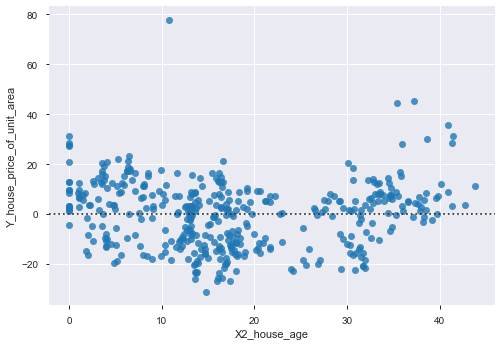

In [60]:
# residual plot(predicted)
sns.residplot(x='X2_house_age',y='Y_house_price_of_unit_area',data=data)

In [61]:
# compare actual values vs predicted values of house price per unit area

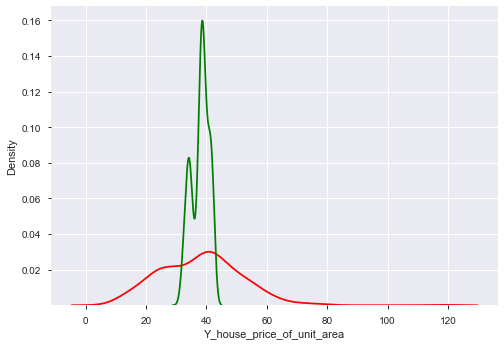

In [62]:
ax1 = sns.distplot(data['Y_house_price_of_unit_area'], hist=False,color='r',label='actual value')
sns.distplot(y1,hist=False,color='g',label='fitted value', ax=ax1)

- so we have lot of difference between actual value and predicted value

Now we will try to fit the model on the basis of all the column which we have

In [64]:
data.head(1)

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9


In [67]:
z = data['X1_transaction_date','X2_house_age','X3_distance_to_the_nearest_MRT_station','X4_number_of_convenience_stores','X5_latitude','X6_longitude']

KeyError: ('X1_transaction_date', 'X2_house_age', 'X3_distance_to_the_nearest_MRT_station', 'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude')

In [68]:
z = data[['X1_transaction_date','X2_house_age','X3_distance_to_the_nearest_MRT_station','X4_number_of_convenience_stores','X5_latitude','X6_longitude']]

In [69]:
lm.fit(z,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
y2 = lm.predict(z)

In [71]:
y2

array([[47.1689389 ],
       [47.82573429],
       [48.79677789],
       [48.36964101],
       [46.13886467],
       [31.13584564],
       [38.61587363],
       [46.85211217],
       [ 9.16603868],
       [34.77290915],
       [33.57234765],
       [53.09676524],
       [40.81426207],
       [26.94175908],
       [45.60486371],
       [38.10925895],
       [50.74281482],
       [37.18549698],
       [46.73342273],
       [47.53381528],
       [35.27726629],
       [49.46841634],
       [28.83473867],
       [47.85745455],
       [34.85705632],
       [31.97023446],
       [46.14266672],
       [42.09675228],
       [42.74715351],
       [45.6877317 ],
       [13.30333363],
       [40.52337885],
       [30.63871176],
       [46.3959655 ],
       [47.09156123],
       [33.19408286],
       [30.47381406],
       [30.84947324],
       [44.37062824],
       [45.87840415],
       [14.39995637],
       [16.50429405],
       [36.5591134 ],
       [40.18913549],
       [47.67033493],
       [39

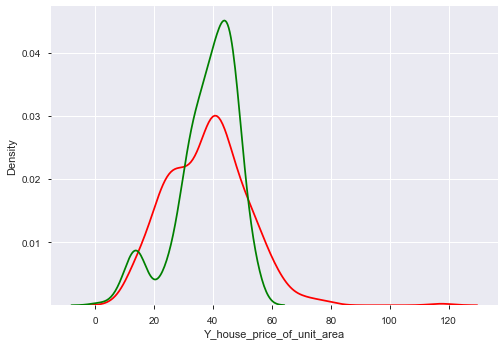

In [72]:
ax1 = sns.distplot(data['Y_house_price_of_unit_area'], hist=False,color='r',label='actual value')
sns.distplot(y2,hist=False,color='g',label='fitted value', ax=ax1)

- here we can see that model has improved now 

In [73]:
# Now what will we do we split the data into two different splits 

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# we split the data such that 70% is for training and 30 % for testing

In [76]:
X_train, X_test, y_train, y_test = train_test_split(z,y, test_size=0.3,random_state=0)

In [77]:
y_test

,Y_house_price_of_unit_area
356,45.3
170,14.4
224,46.0
331,15.6
306,50.2
...,...
353,31.3
81,36.8
107,26.6
362,40.0


In [79]:
X_train

,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude
294,2013.500,26.4,335.52730,6,24.97960,121.54140
96,2013.417,6.4,90.45606,9,24.97433,121.54310
377,2013.333,3.9,49.66105,8,24.95836,121.53756
89,2013.500,23.0,3947.94500,0,24.94783,121.50243
233,2013.333,39.7,333.36790,9,24.98016,121.53932
...,...,...,...,...,...,...
323,2013.417,28.6,197.13380,6,24.97631,121.54436
192,2013.167,43.8,57.58945,7,24.96750,121.54069
117,2013.000,13.6,4197.34900,0,24.93885,121.50383
47,2013.583,35.9,640.73910,3,24.97563,121.53715


In [80]:
X_train.columns

Index(['X1_transaction_date', 'X2_house_age',
       'X3_distance_to_the_nearest_MRT_station',
       'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude'],
      dtype='object')

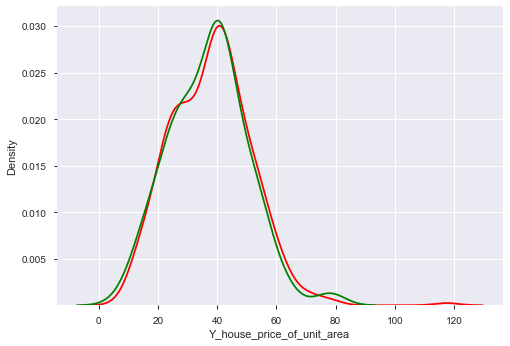

In [82]:
# Actual vs predicted value after splitting the data
ax1 = sns.distplot(data['Y_house_price_of_unit_area'], hist=False,color='r',label='actual value')
sns.distplot(y_test,hist=False,color='g',label='fitted value', ax=ax1)

In [83]:
# Now we can see that we are exactly getting predicted value as actual value 

In [84]:
lm.intercept_

array([-14437.10080228])

In [85]:
lm.coef_

array([[ 5.14622746e+00, -2.69695448e-01, -4.48746107e-03,
         1.13327690e+00,  2.25472976e+02, -1.24236012e+01]])